# Digit Recognizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from utils import plot_images
%matplotlib inline
sns.set(style="dark", rc={'figure.figsize':(11.7,8.27)})
sns.set_palette(sns.color_palette("Paired"))

In [2]:
data = pd.read_csv('dataset/train.csv').sample(frac=1) # This data will be split into train, test, valid
submission_test = pd.read_csv('dataset/test.csv') # submission_test is the dataset we are using for the submission
Xtrain, Xtest = train_test_split(data, test_size=0.2)
Xtrain, Xvalid = train_test_split(Xtrain, test_size=0.2)

Ytrain = Xtrain.pop('label')
Ytest = Xtest.pop('label')
Yvalid = Xvalid.pop('label')

In [3]:
Xtrain.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Ytrain.head()

37544    4
14904    5
25341    7
20554    3
19880    7
Name: label, dtype: int64

In [5]:
Xtest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Ytest.head()

10837    6
24086    4
40342    7
11878    3
2939     6
Name: label, dtype: int64

In [7]:
Xvalid.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4273,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Yvalid.head()

6651     9
33798    5
28711    5
36996    2
4273     3
Name: label, dtype: int64

In [9]:
num_train = len(Xtrain)
num_test = len(Xtest)
num_valid = len(Xvalid)
total_examples = num_train + num_test + num_valid
print("There are " + str(num_train) + " training examples")
print("There are " + str(num_test) + " test examples")
print("There are " + str(num_valid) + " validation examples")
print(str(num_train/total_examples*100) + "% of the total data set is train.")
print(str(num_test/total_examples*100) + "% of the total dat set is test.")
print(str(num_valid/total_examples*100) + "% of the total dat set is valid.")

There are 26880 training examples
There are 8400 test examples
There are 6720 validation examples
64.0% of the total data set is train.
20.0% of the total dat set is test.
16.0% of the total dat set is valid.


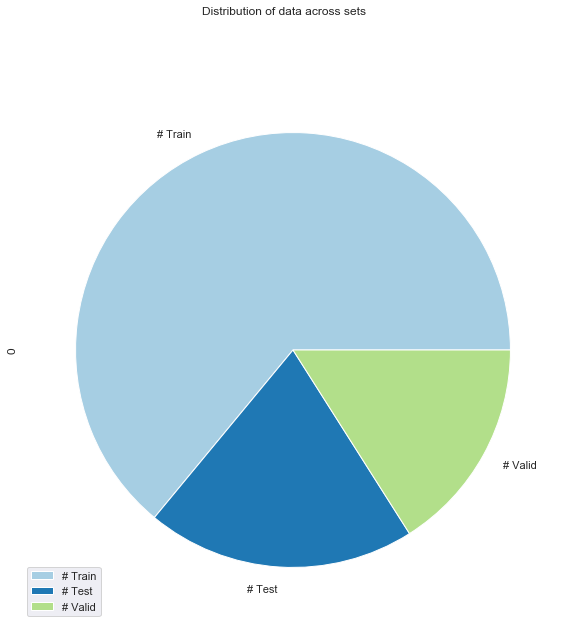

In [10]:
all_data = pd.DataFrame([num_train, num_test, num_valid],index=['# Train', '# Test', '# Valid'])
all_data.plot.pie(subplots=True, figsize=(10, 10), title="Distribution of data across sets")
plt.show()

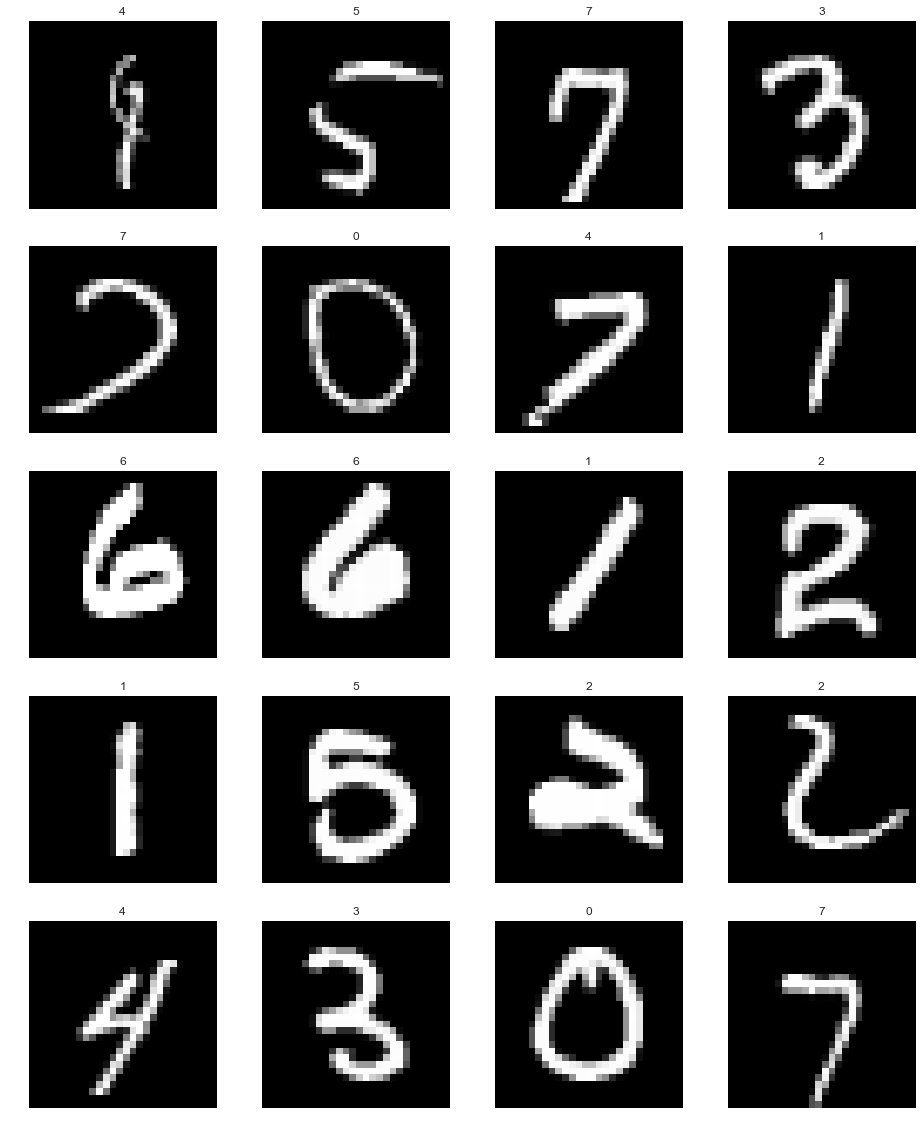

In [11]:
plot_images(Xtrain.head(20).values.reshape((-1, 28, 28)), cols=4, labels=Ytrain.head(20).values)

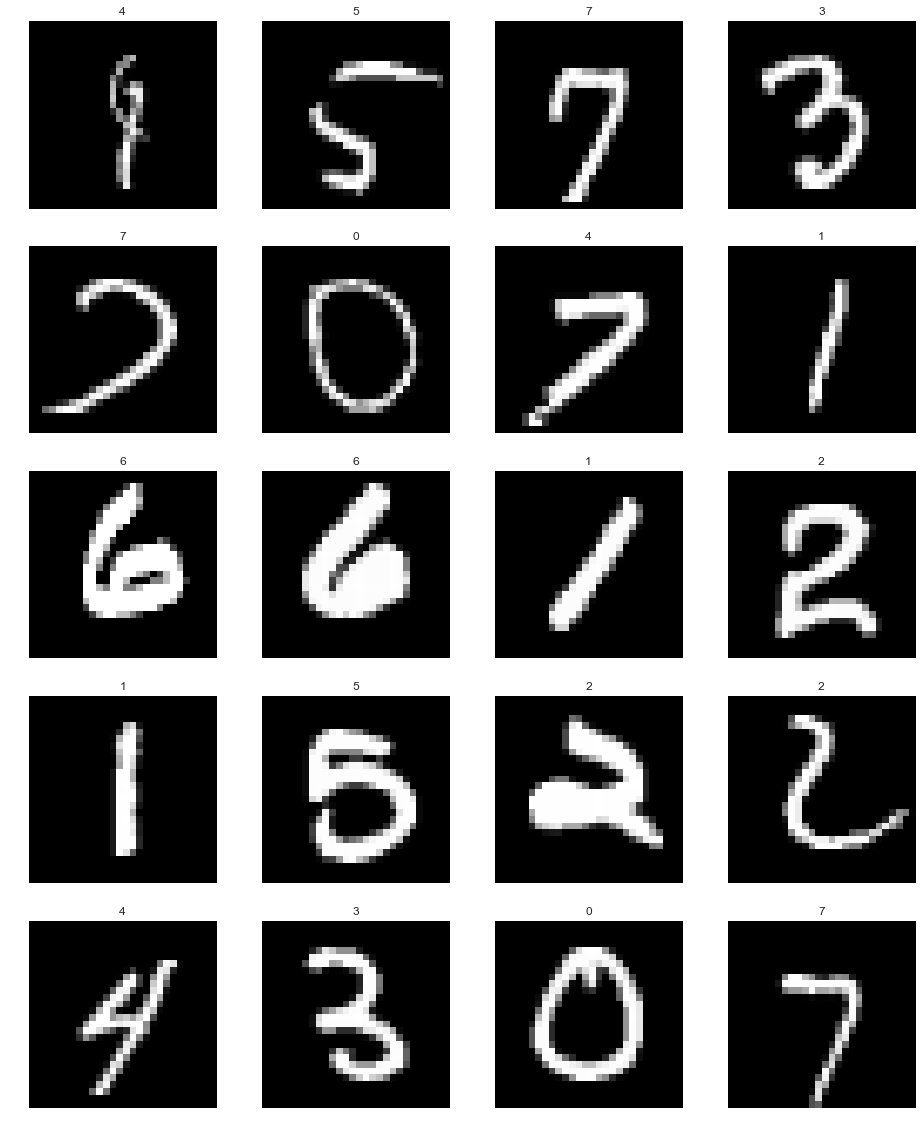

In [12]:
normalized_Xtrain_sample = Xtrain.head(20).values.reshape(-1, 28, 28) / 255.0
plot_images(normalized_Xtrain_sample, cols=4, labels=Ytrain.head(20).values)

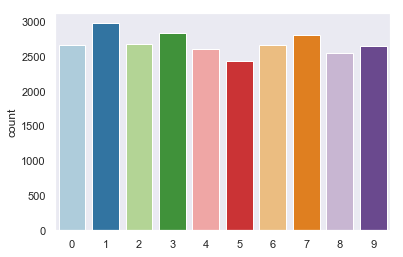

In [13]:
sns.countplot(Ytrain.values)
plt.show()

In [14]:
Xtrain = Xtrain.values.reshape(-1, 28, 28, 1) / 255.0
Xvalid = Xvalid.values.reshape(-1, 28, 28, 1) / 255.0
Xtest = Xtest.values.reshape(-1, 28, 28, 1) / 255.0

train_data = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain.values)).shuffle(len(Xtrain)).batch(32)
valid_data = tf.data.Dataset.from_tensor_slices((Xvalid, Yvalid.values)).batch(32)

In [15]:
from digit_recognition import DigitRecognitionModel, DigitRecognition

In [16]:
EPOCHS = 100
model = DigitRecognitionModel()
learn_rate = 1e-3
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(lr=learn_rate)
dr = DigitRecognition(
    model,
    optimizer,
    loss_object,
    train_data,
    valid_data
)

dr.fit(EPOCHS)

Epoch 1, Train Loss: 0.20141249895095825, Train Accuracy: 93.8355712890625, Validation Loss: 0.08770255744457245, Validation Accuracy: 97.32142639160156
Epoch 2, Train Loss: 0.13096508383750916, Train Accuracy: 95.9672622680664, Validation Loss: 0.07138478010892868, Validation Accuracy: 97.81993865966797
Epoch 3, Train Loss: 0.10021419078111649, Train Accuracy: 96.88864135742188, Validation Loss: 0.06246809661388397, Validation Accuracy: 98.07539367675781
Epoch 4, Train Loss: 0.08197484910488129, Train Accuracy: 97.4488525390625, Validation Loss: 0.06023320555686951, Validation Accuracy: 98.15848541259766
Epoch 5, Train Loss: 0.06938543170690536, Train Accuracy: 97.83407592773438, Validation Loss: 0.05840545520186424, Validation Accuracy: 98.2589340209961
Epoch 6, Train Loss: 0.060374874621629715, Train Accuracy: 98.10826110839844, Validation Loss: 0.05654097720980644, Validation Accuracy: 98.3606185913086
Epoch 7, Train Loss: 0.053774457424879074, Train Accuracy: 98.31792449951172, Va

Epoch 54, Train Loss: 0.009283742867410183, Train Accuracy: 99.7191162109375, Validation Loss: 0.06795506179332733, Validation Accuracy: 98.86821746826172
Epoch 55, Train Loss: 0.009125850163400173, Train Accuracy: 99.72415924072266, Validation Loss: 0.0681968703866005, Validation Accuracy: 98.87175750732422
Epoch 56, Train Loss: 0.008973595686256886, Train Accuracy: 99.72901916503906, Validation Loss: 0.06842952221632004, Validation Accuracy: 98.87516021728516
Epoch 57, Train Loss: 0.008826684206724167, Train Accuracy: 99.73371124267578, Validation Loss: 0.06865531951189041, Validation Accuracy: 98.8784408569336
Epoch 58, Train Loss: 0.008684838190674782, Train Accuracy: 99.73823547363281, Validation Loss: 0.06887409090995789, Validation Accuracy: 98.88162231445312
Epoch 59, Train Loss: 0.008547801524400711, Train Accuracy: 99.74260711669922, Validation Loss: 0.06908673048019409, Validation Accuracy: 98.88468170166016
Epoch 60, Train Loss: 0.008415332064032555, Train Accuracy: 99.7468

In [17]:
model.summary()

Model: "digit_recognition_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
re_lu (ReLU)                 multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18464     
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  147584    
_________________________________________________________________
dropout (Dropout)            multiple      

In [18]:
model.save_weights('digit_recognizer.h5')

In [19]:
predictions = dr.predict(Xtest)
test_loss, test_accuracy = dr.score(Ytest.values, predictions)
print("Test loss is {}".format(test_loss))
print("Test accuracy is: {}".format(float(test_accuracy) * 100))

Test loss is 0.08904489129781723
Test accuracy is: 98.98809790611267


In [20]:
sub_test = submission_test.values.reshape(-1, 28, 28, 1) / 255.0
sub_test = tf.data.Dataset.from_tensor_slices(sub_test).batch(1024) # Ran out of memory without batching
predictions = []
for images in sub_test:
    if len(predictions) == 0:
        predictions = dr.predict(images)
    else:
        predictions = np.concatenate([predictions, dr.predict(images)])

pred_df = pd.DataFrame({'Label': tf.argmax(input=predictions, axis=1)})

In [21]:
pred_df.index = np.arange(1, len(pred_df)+1)
pred_df.to_csv('submission.csv', index_label='ImageId')